# PROJECT - APPOINTMENT NO SHOW

# Introduction


### Description: This dataset collects information from 100k medical appointments in Brazil and is focused on
the question of whether or not patients show up for their appointment. A number of characteristics about
the patient are included in each row.

#### Columns Description

PatientId : The patient's ID(Identification Number)

AppointmentID : Appointment ID(Identification Nunber) this field should be unique for each
appointment

Gender : Patient's gender (Male/Female)

ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.

AppointmentDay : The day someone called or registered the appointment, this is before appointment
of course.

Age : How old is the patient

Neighborhood : Where the appointment takes place(Health Center Location)

Scholarship : Shows whether or not the patient is enrolled in Brasilian welfare program Bolsa
Família.(1 if true, 0 if False)

Hipertension : Tells if the patient is experiencing Hypertension.(1 if true, 0 if False)

Diabetes :Tells if the patient is experiencing Diabetes.(1 if true, 0 if False)

Alcoholism :Tells if thepatient is experiencing Alcoholism.(1 if true, 0 if False)

Handcap : Tells if the patient is with special needs.(Ranking from 0-4 to show the level of special
needs)

SMS_received : Tells if the patient has received a reminder text message and the number of
messages received(1 if true, 0 if False)

Show-up : ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## We will be investigating the dataset to uncover the following:

What factors are important for us to know in order to predict if a patient will show up for their
scheduled appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#After visual inspection, we are opting to validate some columns
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
#Above produces a -1 we have to remove for later
#Columns such as Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show have just 0s and 1s, 
#Hence their dtypes can be changed to optimise our work
#lets check for CAVCU
#Completeness: 
#Accuracy
#Validity
#Consistency of values
#Uniquesness

In [10]:
#Starting from Uniqueness:
df.duplicated().sum()

0

In [11]:
#giving 0 duplicates,

#using a function to check for duplicates INSIDE columns:
def check_duplicates(df):
    duplicated_message = []
    for column in df.columns:
        duplicate_count = df[column].duplicated().sum()
        duplicated_message.append(f"{column} has {duplicate_count} duplicates")
        
    return " ".join(duplicated_message)



In [12]:
check_duplicates(df)

'PatientId has 48228 duplicates AppointmentID has 0 duplicates Gender has 110525 duplicates ScheduledDay has 6978 duplicates AppointmentDay has 110500 duplicates Age has 110423 duplicates Neighbourhood has 110446 duplicates Scholarship has 110525 duplicates Hipertension has 110525 duplicates Diabetes has 110525 duplicates Alcoholism has 110525 duplicates Handcap has 110522 duplicates SMS_received has 110525 duplicates No-show has 110525 duplicates'

In [13]:
df.PatientId.nunique()


62299

In [14]:
#meaning that there are expected repitiions of patients at the hospital
#Consistency of value:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [15]:
#Even though ScheduledDay, AppointmentDay have too many information per cell, all columns have consistent bvalues

In [16]:
#Validity: ScheduledDay, AppointmentDay definitely arent valid as they have more than 1 info to be split, 
#Age has a -1 value that isnt valid
#

In [17]:
#Accuracy- for this we check data types and its shapes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
#min of Age shows -1, definitely an odd value to be cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [19]:
df.index

RangeIndex(start=0, stop=110527, step=1)

In [20]:
df.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [21]:
#as mentioned before, no need for the used dtype of MOST columns in here
#now to juts specify somethings here, we use another function

In [22]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [23]:
def give_unique():
    unique_forcolumn = []
    for column in df.columns:
        check_count = df[column].nunique()
        unique_forcolumn.append(f"{column} has {check_count} unique values")
    return " ".join(unique_forcolumn)
        
give_unique()
#with this we check the unique values in EVERY COLUMN 😁

'PatientId has 62299 unique values AppointmentID has 110527 unique values Gender has 2 unique values ScheduledDay has 103549 unique values AppointmentDay has 27 unique values Age has 104 unique values Neighbourhood has 81 unique values Scholarship has 2 unique values Hipertension has 2 unique values Diabetes has 2 unique values Alcoholism has 2 unique values Handcap has 5 unique values SMS_received has 2 unique values No-show has 2 unique values'

In [24]:
#Completeness
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Data Wrangling


In [25]:
#beginning to actually work on our data, we have a couple things to do, 
#I would list most of them out in the next cell

In [26]:
#Age of -1 has to be taken out
#ScheduledDay, AppointmentDay have to be split as many times as possible
#Hipertension has to be renamed 
#Type conversion for MOST of our columns
#

In [27]:
df = df[df['Age']>=0]

In [28]:
#should have 1 less row now really
df.shape

(110526, 14)

In [29]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [30]:
#let us split appointmentday first into the standard date, 
#also the scheduled day to show the day its scheduled for, and also its date

df['AppoinmentDate'] = pd.to_datetime(df['AppointmentDay'], dayfirst = True).dt.date
#date

In [31]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29


In [32]:
df['AppoinmentDDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
#day for further analysis

In [33]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppoinmentDDay
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday


In [34]:
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
#date it eas scheduled

In [35]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppoinmentDDay,ScheduledDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29


In [36]:
#now we drop the two other columns
df.drop(['ScheduledDay', 'AppointmentDay'], axis =1, inplace=True)

In [37]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppoinmentDDay,ScheduledDate
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29


In [38]:
#renaming hipertsnsion:
df.rename(columns={'Hipertension':'Hypertension', 'AppoinmentDDay':'AppointmentDay'}, inplace=True)

In [39]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29


In [40]:
#now, converting our types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
AppoinmentDate     object
AppointmentDay     object
ScheduledDate      object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   Age             110526 non-null  int64  
 4   Neighbourhood   110526 non-null  object 
 5   Scholarship     110526 non-null  int64  
 6   Hypertension    110526 non-null  int64  
 7   Diabetes        110526 non-null  int64  
 8   Alcoholism      110526 non-null  int64  
 9   Handcap         110526 non-null  int64  
 10  SMS_received    110526 non-null  int64  
 11  No-show         110526 non-null  object 
 12  AppoinmentDate  110526 non-null  object 
 13  AppointmentDay  110526 non-null  object 
 14  ScheduledDate   110526 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 13.5+ MB


In [42]:
#lets see our min and max values:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [43]:
#for better viewing, 
df.min()

PatientId         39217.84439
AppointmentID         5030230
Gender                      F
Age                         0
Neighbourhood       AEROPORTO
Scholarship                 0
Hypertension                0
Diabetes                    0
Alcoholism                  0
Handcap                     0
SMS_received                0
No-show                    No
AppoinmentDate     2016-04-29
AppointmentDay         Friday
ScheduledDate      2015-11-10
dtype: object

In [44]:
df.max()

PatientId         999981631772427.0
AppointmentID               5790484
Gender                            M
Age                             115
Neighbourhood            VILA RUBIM
Scholarship                       1
Hypertension                      1
Diabetes                          1
Alcoholism                        1
Handcap                           4
SMS_received                      1
No-show                         Yes
AppoinmentDate           2016-06-08
AppointmentDay            Wednesday
ScheduledDate            2016-06-08
dtype: object

In [45]:
#Hancap coolumns catches the eye, so i go in to investigate further really
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [46]:
#from this we can see our min and max values very clearly and work witht ehm really
#the handcam can still be reduced as its value range is between 0 and 4

In [47]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'AppoinmentDate', 'AppointmentDay',
       'ScheduledDate'],
      dtype='object')

In [48]:
df.head(2)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29


In [49]:
df[['Scholarship','Hypertension','Diabetes','Alcoholism','Handcap','SMS_received', 'Age']] = df[['Scholarship','Hypertension','Diabetes','Alcoholism','Handcap','SMS_received', 'Age']].astype('int8')

In [50]:
#we have optimised those ones really
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   Age             110526 non-null  int8   
 4   Neighbourhood   110526 non-null  object 
 5   Scholarship     110526 non-null  int8   
 6   Hypertension    110526 non-null  int8   
 7   Diabetes        110526 non-null  int8   
 8   Alcoholism      110526 non-null  int8   
 9   Handcap         110526 non-null  int8   
 10  SMS_received    110526 non-null  int8   
 11  No-show         110526 non-null  object 
 12  AppoinmentDate  110526 non-null  object 
 13  AppointmentDay  110526 non-null  object 
 14  ScheduledDate   110526 non-null  object 
dtypes: float64(1), int64(1), int8(7), object(6)
memory usage: 8.3+ MB


In [51]:
df['PatientId'] = df['PatientId'].astype('int64')
#as int takes less values in memory


In [52]:
df['AppointmentID'] = df['AppointmentID'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  int64 
 1   AppointmentID   110526 non-null  int32 
 2   Gender          110526 non-null  object
 3   Age             110526 non-null  int8  
 4   Neighbourhood   110526 non-null  object
 5   Scholarship     110526 non-null  int8  
 6   Hypertension    110526 non-null  int8  
 7   Diabetes        110526 non-null  int8  
 8   Alcoholism      110526 non-null  int8  
 9   Handcap         110526 non-null  int8  
 10  SMS_received    110526 non-null  int8  
 11  No-show         110526 non-null  object
 12  AppoinmentDate  110526 non-null  object
 13  AppointmentDay  110526 non-null  object
 14  ScheduledDate   110526 non-null  object
dtypes: int32(1), int64(1), int8(7), object(6)
memory usage: 7.9+ MB


In [53]:
df.shape

(110526, 15)

In [54]:
df.head(10)
#checking our head incase we can see any thing to wrangle

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29
5,95985133231274,5626772,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-27
6,733688164476661,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-29,Friday,2016-04-27
7,3449833394123,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-29,Friday,2016-04-27
8,56394729949972,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
9,78124564369297,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-27


In [55]:
#10 samples to verify we are all good
df.sample(10)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
100680,8481613784683,5615973,F,23,TABUAZEIRO,1,0,0,0,0,1,No,2016-06-08,Wednesday,2016-04-25
77942,2928125955283,5671371,M,37,JARDIM CAMBURI,0,0,0,0,0,0,No,2016-05-06,Friday,2016-05-06
69971,94411894549983,5713704,F,88,CONQUISTA,0,1,0,0,0,0,No,2016-05-18,Wednesday,2016-05-18
48385,33927864298839,5566092,F,46,CENTRO,0,1,0,0,0,0,No,2016-05-04,Wednesday,2016-04-11
65809,73365797377,5695267,M,10,JARDIM CAMBURI,0,0,0,0,0,0,No,2016-05-13,Friday,2016-05-13
5336,52421865597559,5708845,M,69,SOLON BORGES,0,0,0,0,0,0,No,2016-05-19,Thursday,2016-05-17
105775,5945813154539,5752740,F,5,JESUS DE NAZARETH,0,0,0,0,0,1,Yes,2016-06-07,Tuesday,2016-05-31
33648,3681336771782,5646624,F,51,CARATOÍRA,0,0,0,0,0,0,No,2016-05-04,Wednesday,2016-05-02
87483,265136438197995,5783163,F,37,CONQUISTA,1,0,0,0,0,0,No,2016-06-07,Tuesday,2016-06-07
55981,7628976119243,5664106,F,15,SANTO ANDRÉ,0,0,0,0,0,0,No,2016-05-20,Friday,2016-05-05


## Exploratory Data Analysis


In [56]:
#Let us pose some questions to answer in this section:

#Knowing well that 1 means a Yes and 0 means a No

# What is our most common neighbourhood turning up for their appointments ?
# What appointment day has the highest number of attendance, is the date its sechduled for the main factor ?
# What age range turn up for their appointment the most
# Take a closer look at the range column
# 

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

In [57]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29


In [58]:
# From the Knowledge that NOSHOW values of 'NO' means the patient was actually 'PRESENT', 
# we create a new table EXPLICITLY FOR ACTUAL ATTENDEES:

df_p = df[df['No-show']=='No']

# should create it above

In [59]:
df_p.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppoinmentDate,AppointmentDay,ScheduledDate
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29


In [60]:
df_p['No-show'].value_counts()
#confirming all! 

No    88207
Name: No-show, dtype: int64

In [61]:
#now we can drop this 'No-show' table 
df_p = df_p.drop('No-show', axis=1)

In [62]:
df_p.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,AppoinmentDate,AppointmentDay,ScheduledDate
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,Friday,2016-04-29
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,Friday,2016-04-29


In [63]:
df_p.shape

(88207, 14)

In [64]:
# What is our most common neighbourhood turning up for their appointments ?

In [65]:
df_p['Neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

Text(0, 0.5, 'Count')

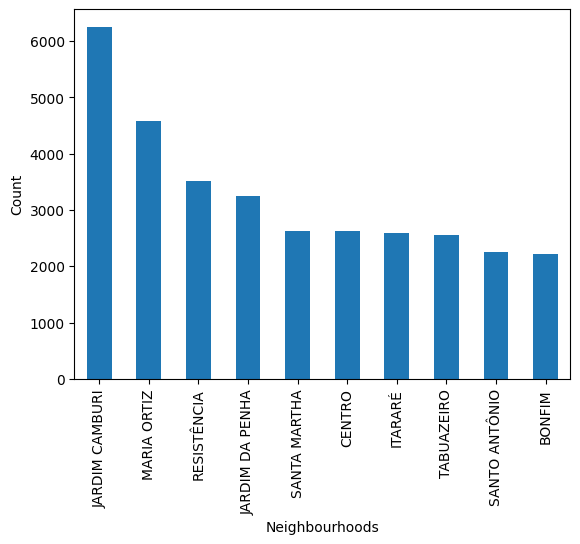

In [66]:
df_p['Neighbourhood'].value_counts().head(10).plot(kind='bar');
plt.xlabel('Neighbourhoods')
plt.ylabel('Count')

In [67]:
#displays top 10 neighourhoods with their attendances
#THe highest being Jardim Camburi with 6K+

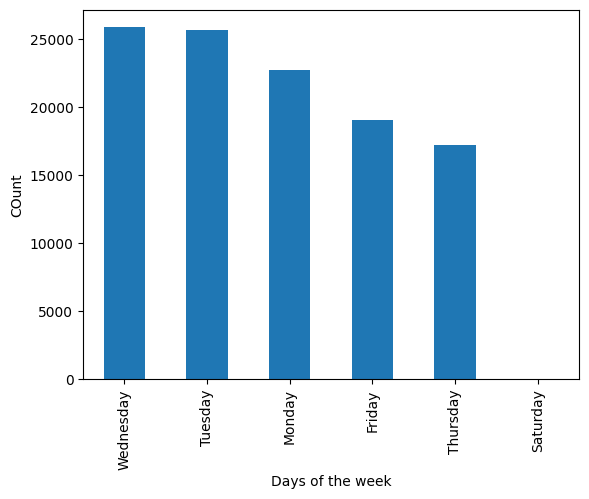

In [68]:
#What appointment day has the highest number of attendance, is the date its sechduled for the main factor ?
df['AppointmentDay'].sort_values(ascending=True).value_counts().plot(kind='bar')
plt.xlabel('Days of the week')
plt.ylabel('COunt');

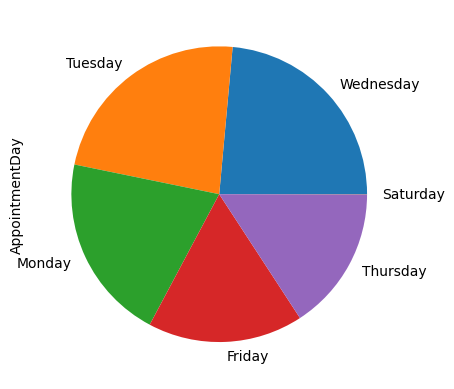

In [69]:
#this means 'Wednesday' is when people are most likely to turn up the most for their appointments really
#we can see this in a pie chart too
df_p['AppointmentDay'].value_counts().plot(kind='pie');

In [70]:
df_p['AgeRange'] = pd.cut(df['Age'], bins=6, labels=['0-20','21-40','41-60','61-80','80-100', '100-120'])
#knowing our ages have 6 distinct age ranges

In [71]:
df_p.sample(10)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,AppoinmentDate,AppointmentDay,ScheduledDate,AgeRange
8972,128111956197,5688163,F,57,BELA VISTA,0,1,0,0,0,0,2016-05-12,Thursday,2016-05-12,41-60
81876,1845422691134,5741908,M,13,ITARARÉ,0,0,0,0,0,0,2016-05-30,Monday,2016-05-30,0-20
94417,62519514273895,5786857,M,46,GURIGICA,0,0,0,0,0,0,2016-06-08,Wednesday,2016-06-08,41-60
8727,99637671331,5704069,M,46,JABOUR,0,0,0,0,0,0,2016-05-16,Monday,2016-05-16,41-60
2894,72538858334765,5641145,M,36,ILHA DE SANTA MARIA,1,0,0,0,0,0,2016-04-29,Friday,2016-04-29,21-40
79966,754275613777,5587537,M,21,BARRO VERMELHO,0,0,1,0,0,0,2016-05-03,Tuesday,2016-04-15,21-40
61092,76451655932829,5661268,F,44,SANTA MARTHA,0,0,0,0,0,0,2016-05-05,Thursday,2016-05-05,41-60
90663,64729825295281,5768004,M,17,CONSOLAÇÃO,0,0,0,0,0,0,2016-06-03,Friday,2016-06-03,0-20
100799,244616965911396,5705478,F,0,GURIGICA,0,0,0,0,0,1,2016-06-06,Monday,2016-05-17,0-20
93162,89121325927944,5766078,F,72,PRAIA DO CANTO,0,0,0,0,0,0,2016-06-02,Thursday,2016-06-02,61-80


In [72]:
#seeing our split values:
df_p['AgeRange'].value_counts()

0-20       23670
41-60      23039
21-40      20994
61-80      16462
80-100      4003
100-120       39
Name: AgeRange, dtype: int64

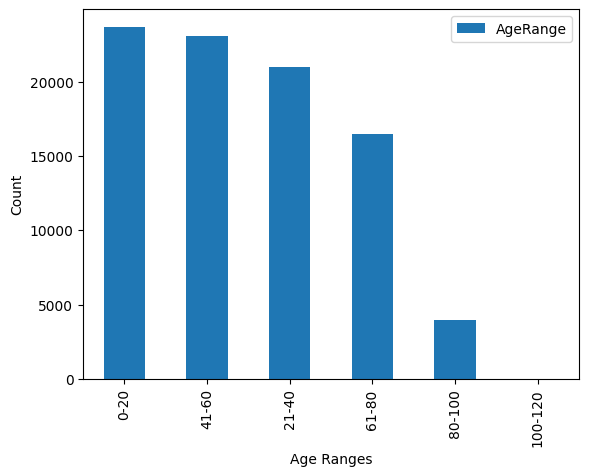

In [73]:
df_p['AgeRange'].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Age Ranges')
plt.ylabel('Count');

In [74]:
#The highest range of people turning up for their appointments are primarily young people within ranges 1-20, 
#from deduction, we can say as people grow older, the lesser they are likely to go for their checkups

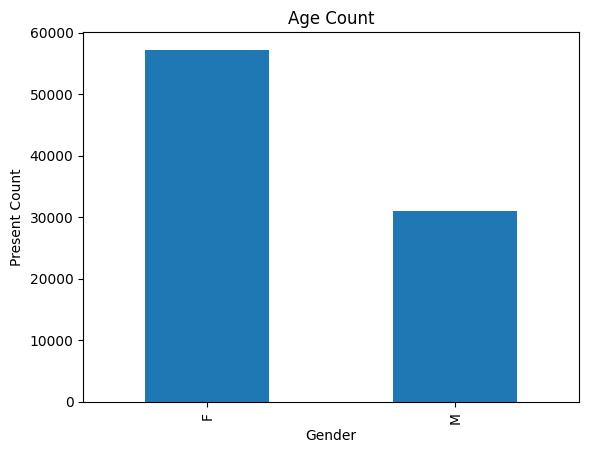

In [75]:
# Taking a closer look at our Gender column: 
df_p['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Present Count')
plt.title('Age Count');

<AxesSubplot: ylabel='Gender'>

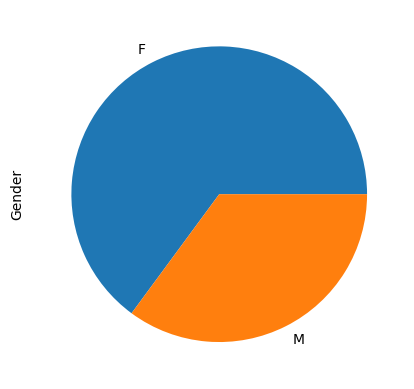

In [76]:
df_p['Gender'].value_counts().plot(kind='pie')

In [77]:
#Seeing a larger percentage of women attend their appointments more

In [78]:
df_p.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,AppoinmentDate,AppointmentDay,ScheduledDate,AgeRange
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,Friday,2016-04-29,61-80
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,41-60
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,61-80
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0-20
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,Friday,2016-04-29,41-60


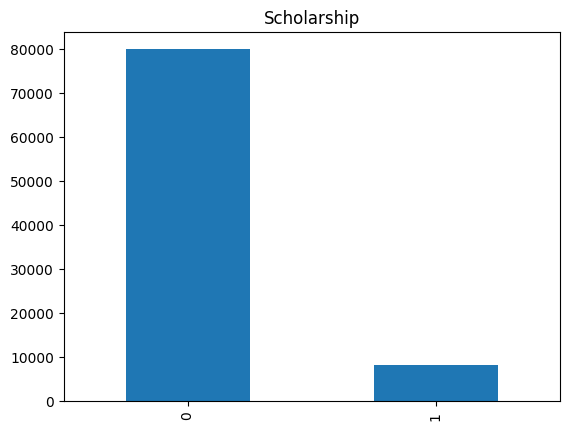

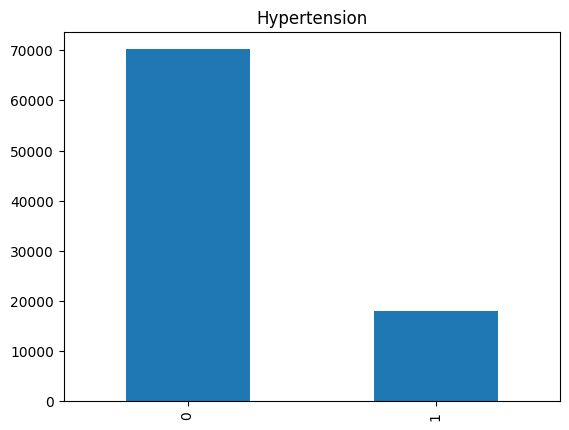

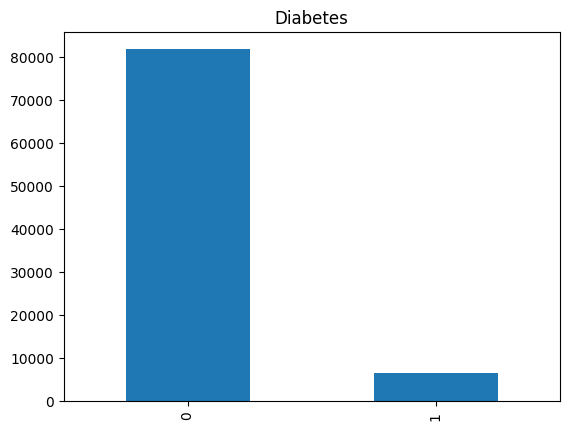

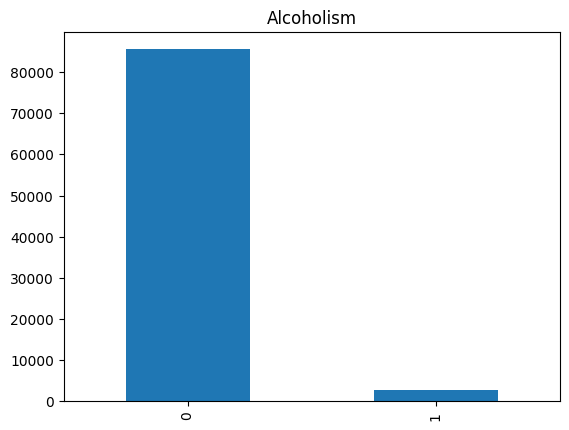

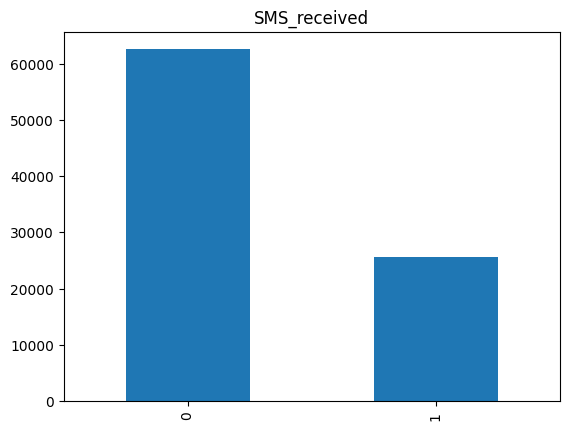

In [79]:
#attemtping to use a for loop to plot somewhat of a bar that displays values of the binary columns:
def plot_bar_for_column(df_p):
    for column in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']:
        df_p[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()


plot_bar_for_column(df_p)

In [80]:
#Fromt the above plots, we can deduce these

# Scholarship: people without scholarships are likely to turn up more 
# Hypertension: people without Hypertension turn up more
# Diabetes: people without diabetes turn up more
# Alcoholism: people without alcoholism turn up more
# SMS_received:sms isnt really a factor for people to turn up, here people with no sms turned up more even

In [88]:
df_p['Scholarship'].value_counts()

0    79924
1     8283
Name: Scholarship, dtype: int64

## Conclusions

In [81]:
#In Conclusion, our results were very contrary to what I was expecting before analysing our dataframe
#Generally, Age, Neighbourhood, Gender were the highest factors that affected our No-shows the most


In [84]:
df_p.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'AppoinmentDate', 'AppointmentDay', 'ScheduledDate',
       'AgeRange'],
      dtype='object')

In [ ]:
#PatientId adn AppointmentID had no effect on our absences really

In [ ]:
#Gender: more women turned up to their appoinments, showing apathy from Males towards their health

In [ ]:
#Age: for our Age, we have a range of between 0-115, one cleaned outlier of -1(definitely not possible)
# the mean age of Attendees was 37.8
#AgeRanges gradually reduced as they went on as 0-20 was highest and 100-120 was lowest

In [ ]:
#Neighbourhood: JARDIM CAMBURI has the highest number of attendees wutg 6252 people turning up in total,
#while PARQUE INDUSTRIAL had just 1. deducing due to proximity 

In [90]:
#AppointmentDate: a whooping 3818 turned up on the 6th June 2016, with the lowest of 30 on the 14th May really

In [ ]:
#AppointmentDay: Most people turned up on Wednesdays, followed by Tuesdays and Mondays, 
#with the least on Saturdays with just 30 patients turning up

In [ ]:
# Sadly, ALL other columns, werent a factor in no-shows, even the scholarship column was underwhelming in that regards

In [92]:
df_p['AppointmentDay'].value_counts()

Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: AppointmentDay, dtype: int64

In [83]:
df_p.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,AppoinmentDate,AppointmentDay,ScheduledDate,AgeRange
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,Friday,2016-04-29,61-80
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,41-60
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,61-80
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0-20
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,Friday,2016-04-29,41-60


## Limitations:



In [ ]:
# The 'scheduledday' and 'appoinmentday' columns had formats that werent needed, we had to explicitly convert
# outliers being so many meant they were harder to find
# so many columns werent in the corect datatype, or took more space than required
